In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


# Storytelling desercion de reservas de hoteles



El abandono de las reservas no solo perjudica a los hoteles, sino también a los clientes que pueden perder la oportunidad de alojarse en su hotel deseado debido a la alta demanda. Además, el problema puede aumentar los costos operativos del hotel, ya que el personal tiene que procesar y manejar las cancelaciones y las habitaciones vacías pueden generar gastos adicionales.

Es crucial que los hoteles entiendan las causas subyacentes del abandono de las reservas y busquen soluciones efectivas para reducirlo. Desde mejorar la comunicación con los clientes hasta ofrecer ofertas y paquetes personalizados, existen diversas estrategias que los hoteles pueden implementar para fomentar la lealtad del cliente y reducir el abandono de las reservas.

En resumen, el abandono de las reservas de hoteles por parte de los clientes es un problema significativo que afecta a la industria del turismo en general. Es necesario abordar este problema con soluciones efectivas y medidas proactivas para mejorar la experiencia del cliente y garantizar la rentabilidad y la sostenibilidad de los hoteles.



1.   [Abstracto](https://colab.research.google.com/drive/1tYQad-gG8UDjQ5YXhVSh5RPbeR5qiXKo#scrollTo=ZCX4xbUSK-Zz)
2.   [Objetivo](https://colab.research.google.com/drive/1tYQad-gG8UDjQ5YXhVSh5RPbeR5qiXKo#scrollTo=cQDbiLJSLZvB)
3. [Contexto Comercial](https://colab.research.google.com/drive/1tYQad-gG8UDjQ5YXhVSh5RPbeR5qiXKo#scrollTo=YyB0W8TYLpZS&line=1&uniqifier=1)
4. [Exploracion de datos](https://colab.research.google.com/drive/1tYQad-gG8UDjQ5YXhVSh5RPbeR5qiXKo#scrollTo=Hmts0LgXMPIz)
5. [Variables](https://colab.research.google.com/drive/1tYQad-gG8UDjQ5YXhVSh5RPbeR5qiXKo#scrollTo=k82lfuPK9NoP&line=2&uniqifier=1)
6. [Preguntas de negocio](https://colab.research.google.com/drive/1tYQad-gG8UDjQ5YXhVSh5RPbeR5qiXKo#scrollTo=RLgDyTZ9Wqzi&line=1&uniqifier=1)



ABSTRACTO

Los canales de reserva de hoteles en línea han cambiado drásticamente las posibilidades de reserva y el comportamiento de los clientes. Un número significativo de reservas de hotel se cancelan debido a cancelaciones o no presentación. Las razones típicas de las cancelaciones incluyen cambios de planes, conflictos de programación, etc. Esto a menudo se facilita con la opción de hacerlo de forma gratuita o, preferiblemente, a un bajo costo, lo que es beneficioso para los huéspedes del hotel, pero es una forma menos deseable y posiblemente rentable para los dueños del hotel.

OBJETIVO

* Predecir si el cliente va a cumplir con la reserva o cancelarla

CONTEXTO COMERCIAL

Nuestros datos tienen 36275 valores y 19 columnas. Aquí usaremos la base de datos "Hotel Reservation.csv" que se ha puesto a disposición para su uso. A continuación, verá un análisis de los datos, el procesamiento de esos datos y el uso del aprendizaje automático. modelos de clasificación para lograr nuestro objetivo


EXPLORACION DE DATOS

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Coderhouse_Dataset/HotelReservation/Hotel Reservations.csv")

In [ ]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled



# DICCIONARIO DE VARIABLES

* Booking_ID: identificador único de cada reserva
* no_of_adults: Número de adultos
* no_of_children: Número de niños
* no_of_weekend_nights: Número de noches de fin de semana (sábado o domingo)    que el huésped se hospedó o reservó para quedarse en el hotel
* no_of_week_nights: Número de noches de la semana (lunes a viernes) que el huésped se hospedó o reservó para quedarse en el hotel
* type_of_meal_plan: Tipo de plan de comidas reservado por el cliente:
*required_car_parking_space: ¿Necesita el cliente una plaza de aparcamiento? (0 - No, 1- Sí)
* room_type_reserved: Tipo de habitación reservada por el cliente. Los valores son cifrados (codificados) por INN Hotels.
* lead_time: Número de días entre la fecha de reserva y la fecha de llegada
* arribo_año: año de la fecha de llegada
* llegada_mes: Mes de la fecha de llegada
* fecha_de_llegada: Fecha del mes
* market_segment_type: Designación del segmento de mercado.
* invitado_repetido: ¿El cliente es un invitado repetido? (0 - No, 1- Sí)
* no_of_previous_cancellations: número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual
* no_of_previous_bookings_not_canceled: Número de reservas anteriores no canceladas por el cliente antes de la reserva actual
* avg_price_per_room: Precio medio por día de la reserva; Los precios de las habitaciones son dinámicos. (en euros)
* no_of_special_requests: número total de solicitudes especiales realizadas por el cliente (por ejemplo, piso alto, vista desde la habitación, etc.)
* booking_status: Bandera que indica si la reserva fue cancelada o no.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# PREGUNTAS DE NEGOCIO



*   ¿La cantidad de personas que cancelan la reservacion es menor que los que no cancelan la reservacion?
*   ¿Que mes del año el hotel obtuvo la mayor cantidad de reservaciones?
*   ¿En que mes del año hay un numero mayor de cancelaciones de reservaciones?
*   ¿El numero de peticiones especiales afecta al precio final del cuarto de reservacion?
*  ¿Hay una relacion entre el numero de niños y el precio de la habitacion?
*  ¿Hay una correlacion entre la cancelacion de una reservacion y el tiempo entre reserva y llegada del huesped?
* ¿Hay una relacion entre la cancelacion de una reservacion y el precio pormedio de la habitacion de hotel?





# La cantidad de reservaciones no canceladas fue mayor que las canceladas

<Axes: xlabel='booking_status', ylabel='count'>

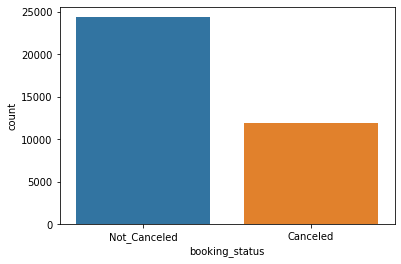

In [ ]:
sns.countplot(x='booking_status', data=df)

# El mes en el que se obtuvo la mayor cantidad de reservaciones es el mes de octubre

<Axes: xlabel='arrival_month', ylabel='count'>

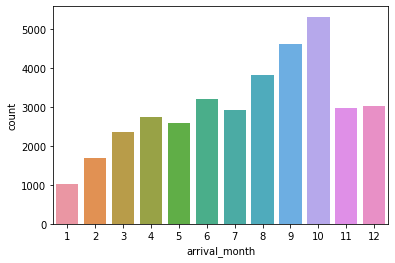

In [ ]:
sns.countplot(x='arrival_month', data=df)

# El mes que obtuvo un mayor porcentaje de cancelaciones fue el mes de  Julio.

In [ ]:
#Total de reservaciones hechas por mes
pd.value_counts(df['arrival_month'])

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

In [ ]:
# Total de reservaciones canceladas por mes
pd.value_counts(df[(df.booking_status=='Canceled')]['arrival_month'])

10    1880
9     1538
8     1488
7     1314
6     1291
4      995
5      948
11     875
3      700
2      430
12     402
1       24
Name: arrival_month, dtype: int64

In [ ]:
#Porcentaje de cancelaciones en comparacion al total
porcentaje  = (pd.value_counts(df[(df.booking_status=='Canceled')]['arrival_month']) * 100) / pd.value_counts(df['arrival_month'])

In [ ]:
#Resultado en porcentaje
porcentaje

1      2.366864
2     25.234742
3     29.686175
4     36.366959
5     36.489607
6     40.305963
7     45.000000
8     39.024390
9     33.355021
10    35.358285
11    29.362416
12    13.306852
Name: arrival_month, dtype: float64

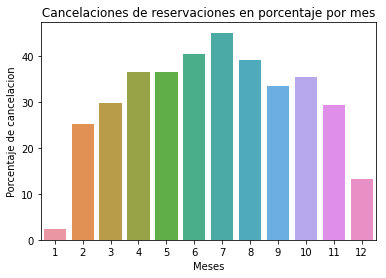

In [ ]:
plt.title(" Cancelaciones de reservaciones en porcentaje por mes ")
sns.barplot(x = porcentaje.index, y = porcentaje.values  )
plt.xlabel("Meses")
plt.ylabel("Porcentaje de cancelacion")
plt.show()

# El numero de peticiones especiales afecta al precio final del cuarto de hotel, mientras mas peticiones haya mas costoso seria la habitacion

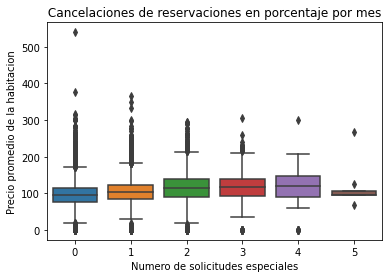

In [ ]:
sns.boxplot(x = df['no_of_special_requests'],y = df['avg_price_per_room'])
plt.title(" Cancelaciones de reservaciones en porcentaje por mes ")
plt.xlabel("Numero de solicitudes especiales")
plt.ylabel("Precio promedio de la habitacion")
plt.show()

# A mayor numero de niños , el precio por habitaicion aumenta. El limite es hasta 3 niños. Casos especiales son mayores a 3.

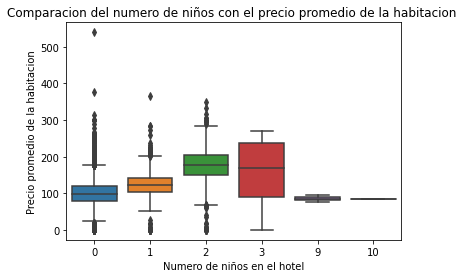

In [ ]:
sns.boxplot(x = df['no_of_children'],y = df['avg_price_per_room'])
plt.title("Comparacion del numero de niños con el precio promedio de la habitacion ")
plt.xlabel("Numero de niños en el hotel")
plt.ylabel("Precio promedio de la habitacion")
plt.show()

# Hay una correlacion positiva entre el tiempo de espera del huesped y que cancelen la reservacion. Mietnras mas tiempo de espera haya desde que hizo la reservacion mas posibilidad hay de que cancele la reservacion

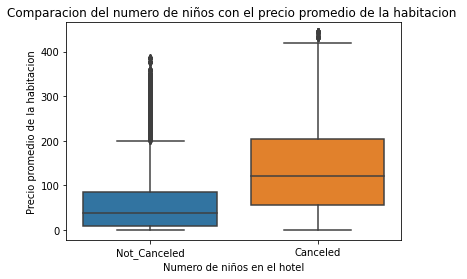

In [ ]:
sns.boxplot(x = df['booking_status'],y = df['lead_time'])
plt.title("Comparacion del numero de niños con el precio promedio de la habitacion ")
plt.xlabel("Numero de niños en el hotel")
plt.ylabel("Tiempo de espera de la habiracion")
plt.show()

# Hay una correlacion positiva entre el precio promedio de la habitacion y la cancelacion de una reservacion. Mientras tenga mas precio , mas posibilidad haya que se cancele la reservacion

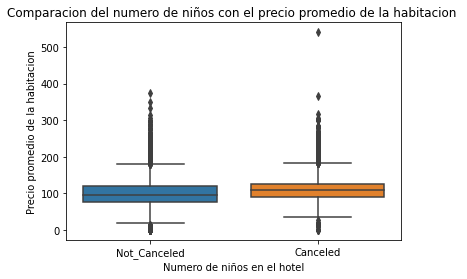

In [ ]:
sns.boxplot(x = df['booking_status'],y = df['avg_price_per_room'])
plt.title("Comparacion del numero de niños con el precio promedio de la habitacion ")
plt.xlabel("Numero de niños en el hotel")
plt.ylabel("Precio promedio de la habitacion")
plt.show()

In [ ]:
fig = px.violin(x=df.no_of_adults, color=df.booking_status)
fig.show()

* Podemos decir que la mayoría de los clientes son solo 2 adultos.
* Es menos probable que estos clientes cancelen la reserva.
* Los clientes con 0 y 4 adultos podrían estar marginados de nuestros datos    porque no pertenecen a la distribución normal de datos.

In [ ]:
vals = df.market_segment_type.value_counts()
names = vals.index
fig = px.pie(values=vals, names=names)
fig.show()

* El 64% de las reservas son reservas online.
* El 29% son reservas fuera de línea.

# Feature Selection : Wrapper Methods

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
X = df.iloc[:, 1:df.shape[1]-1]  # Se selecciona todas las columnas menos la primera y la ultima
y = df.iloc[:,[18]] # Solo se selecciona el ultimo elemento

In [ ]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0


In [ ]:
y

,booking_status
0,Not_Canceled
1,Not_Canceled
2,Canceled
3,Canceled
4,Canceled
...,...
36270,Not_Canceled
36271,Canceled
36272,Not_Canceled
36273,Canceled


In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# DATA WRALING

In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

Booking_ID
False    36275
Name: Booking_ID, dtype: int64

no_of_adults
False    36275
Name: no_of_adults, dtype: int64

no_of_children
False    36275
Name: no_of_children, dtype: int64

no_of_weekend_nights
False    36275
Name: no_of_weekend_nights, dtype: int64

no_of_week_nights
False    36275
Name: no_of_week_nights, dtype: int64

type_of_meal_plan
False    36275
Name: type_of_meal_plan, dtype: int64

required_car_parking_space
False    36275
Name: required_car_parking_space, dtype: int64

room_type_reserved
False    36275
Name: room_type_reserved, dtype: int64

lead_time
False    36275
Name: lead_time, dtype: int64

arrival_year
False    36275
Name: arrival_year, dtype: int64

arrival_month
False    36275
Name: arrival_month, dtype: int64

arrival_date
False    36275
Name: arrival_date, dtype: int64

market_segment_type
False    36275
Name: market_segment_type, dtype: int64

repeated_guest
False    36275
Name: repeated_guest, dtype: int64

no_of_previous_cancellations
False    3627

<Axes: >

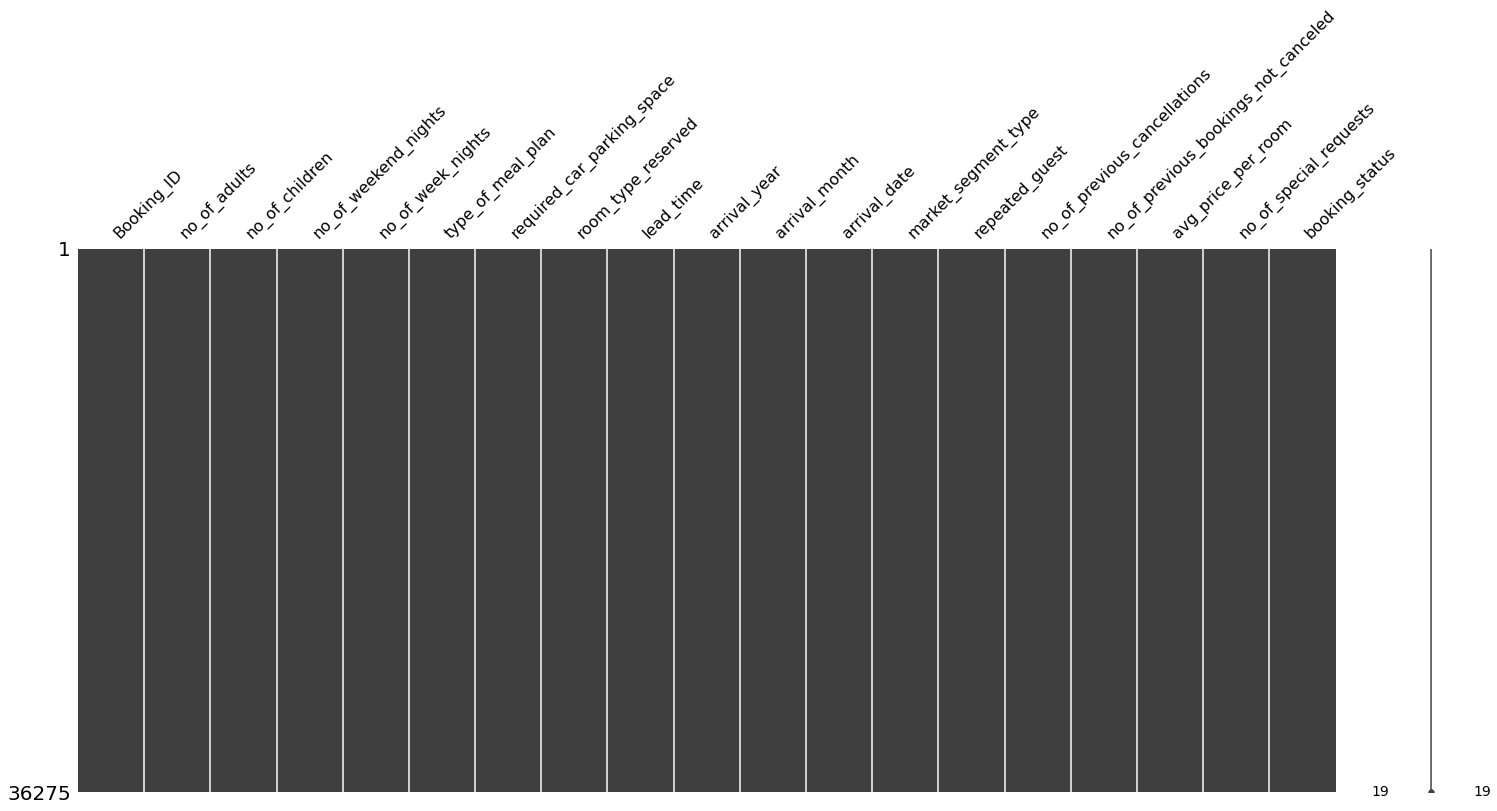

In [ ]:
import missingno as msno
msno.matrix(df)

# verificacion de nulos

In [ ]:
sum(df.isnull().sum())

0

# verificacion de duplicados

In [ ]:
print(df.shape)
df= df.drop_duplicates()
print(df.shape)

(36275, 19)
(36275, 19)


# Transformacion de data

In [ ]:
# Codificación ordinal
size_mapping = {'Meal Plan 1': 1, 'Not Selected': 2, 'Meal Plan 2': 3, 'Meal Plan 3': 4}
X['type_of_meal_plan'] = X['type_of_meal_plan'].map(size_mapping)

In [ ]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,2,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,2,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1
36271,2,0,1,3,1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2
36272,2,0,2,6,1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2
36273,2,0,0,3,2,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0


In [ ]:
size_mapping = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4,
       'Room_Type 5': 5, 'Room_Type 6':6, 'Room_Type 7':7}
X['room_type_reserved'] = X['room_type_reserved'].map(size_mapping)

In [ ]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,1,0,1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,2,0,1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,1,0,1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,1,0,1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,2,0,1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018,8,3,Online,0,0,0,167.80,1
36271,2,0,1,3,1,0,1,228,2018,10,17,Online,0,0,0,90.95,2
36272,2,0,2,6,1,0,1,148,2018,7,1,Online,0,0,0,98.39,2
36273,2,0,0,3,2,0,1,63,2018,4,21,Online,0,0,0,94.50,0


In [ ]:
size_mapping = {'Offline':1, 'Online':2, 'Corporate':3, 'Aviation':4, 'Complementary':5}
X['market_segment_type'] = X['market_segment_type'].map(size_mapping)

In [ ]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0
1,2,0,2,3,2,0,1,5,2018,11,6,2,0,0,0,106.68,1
2,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0
3,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0
4,2,0,1,1,2,0,1,48,2018,4,11,2,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018,8,3,2,0,0,0,167.80,1
36271,2,0,1,3,1,0,1,228,2018,10,17,2,0,0,0,90.95,2
36272,2,0,2,6,1,0,1,148,2018,7,1,2,0,0,0,98.39,2
36273,2,0,0,3,2,0,1,63,2018,4,21,2,0,0,0,94.50,0


In [ ]:
size_mapping = {'Not_Canceled':0, 'Canceled':1}
y['booking_status'] = y['booking_status'].map(size_mapping)

<ipython-input-104-5ceaa4973d7a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
y

,booking_status
0,0
1,0
2,1
3,1
4,1
...,...
36270,0
36271,1
36272,0
36273,1


# Modelos Analiticos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el clasificador con el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Predecir los resultados del conjunto de prueba
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.8677754295690526


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Crear un modelo de Random Forest
model = RandomForestClassifier()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Predecir los resultados del conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

<ipython-input-108-ab516d17cafb>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Precisión del modelo: 0.9031517044932463


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Predecir los resultados del conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Precisión del modelo: 0.7865478268859689


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

